# Detect and Remove Outliers in Python

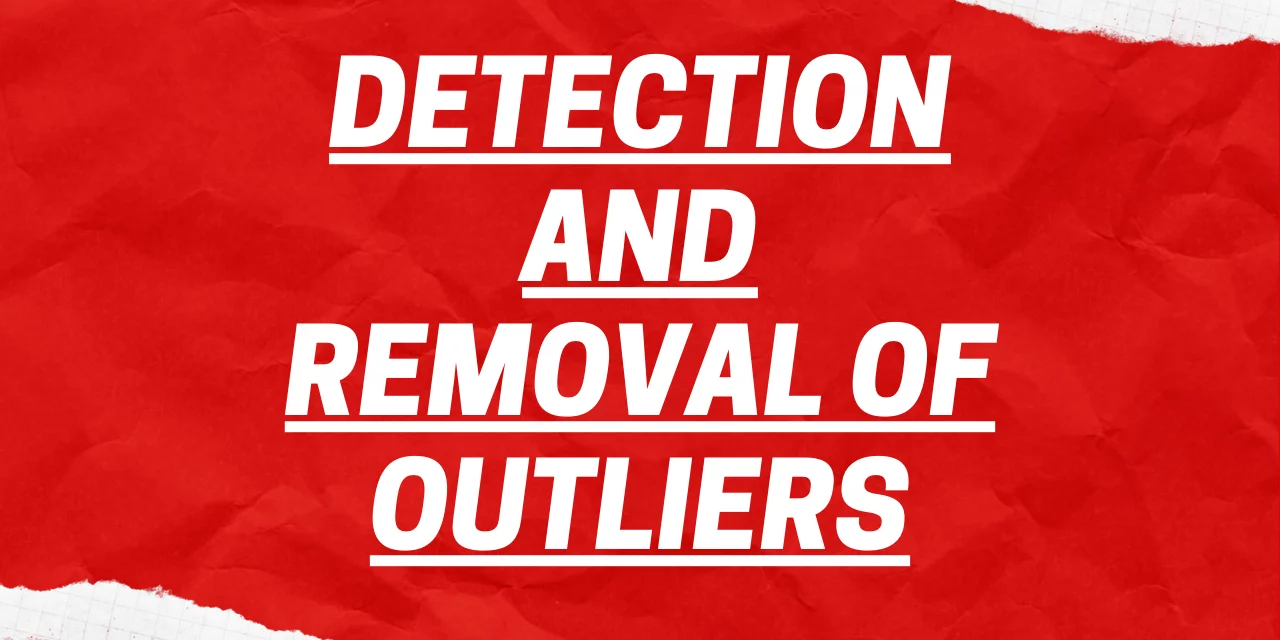

# What are Outliers in Python?

In [ ]:
An outlier is a point or set of data points that lie away from the rest of the data values of the dataset.
That is, it is a data point(s) that appear away from the overall distribution of data values in a dataset.

Outliers are possible only in continuous values. Thus, the detection and removal of outliers are applicable 
to regression values only.

Basically, outliers appear to diverge from the overall proper and well structured distribution of the data elements. 
It can be considered as an abnormal distribution which appears away from the class or population

# Why is it necessary to remove outliers from the data?

In [ ]:
Affects the overall standard variation of the data.
Manipulates the overall mean of the data.
Converts the data to a skewed form.
It causes bias in the accuracy estimation of the machine learning model.
Affects the distribution and statistics of the dataset.

In [ ]:
#Detection of Outliers – IQR approach
The outliers in the dataset can be detected by the below methods:

Z-score
Scatter Plots/Boxplot
Interquartile range(IQR)

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('dataset/googleplaystore.csv')

In [3]:
cat_col=[fea for fea in dataset.columns if dataset[fea].dtype == 'O']

In [4]:
cat_col

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [4]:
num_col=[fea for fea in dataset.columns if dataset[fea].dtype != 'O']

In [6]:
num_col

['Rating']

In [5]:
def printinfo():
    temp = pd.DataFrame(index=dataset.columns)
    temp['data_type'] = dataset.dtypes
    temp['null_count'] = dataset.isnull().sum()
    temp['unique_count'] = dataset.nunique()
    return temp

In [7]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [52]:
dataset['Type'].fillna("Free", inplace = True)

In [53]:
dataset[dataset['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [54]:
dataset.dropna(subset = ['Content Rating'], inplace=True)

In [55]:
modeValueRating = dataset['Rating'].mode()

In [56]:
dataset['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [12]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [57]:
dataset['Size'] = dataset.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega

In [58]:
dataset['Size'] = dataset.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo

In [59]:
dataset['Size'] = dataset.Size.replace('Varies with device', np.NaN)

In [60]:
dataset['Size'] = pd.to_numeric(dataset['Size']) # Converting the string to Numeric type

In [61]:
dataset.dropna(subset = ['Size'], inplace=True)

In [62]:
dataset['Installs'] = dataset['Installs'].map(lambda x: x.rstrip('+'))
dataset['Installs'] = dataset['Installs'].replace(',', '', regex = True)
dataset['Installs'] = dataset['Installs'].replace('Free', '', regex = True)
dataset['Installs'] = dataset['Installs'].replace('', 0, regex = True)
dataset['Installs'] = dataset['Installs'].astype(int)

In [19]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,int32,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [63]:
dataset['Price'] =dataset.Price.apply(lambda x: x.strip('$'))

In [64]:
dataset['Price'] = pd.to_numeric(dataset['Price'])

In [65]:
dataset['Reviews'] = dataset['Reviews'].map(lambda x: x.rstrip('M'))

In [66]:
dataset.Reviews= dataset.Reviews.astype(float) 

In [67]:
dataset.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [25]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,float64,0,4680
Size,float64,0,459
Installs,int32,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [26]:
num_col=[fea for fea in dataset.columns if dataset[fea].dtype != 'O']

In [27]:
num_col

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMITAVA\Anaconda

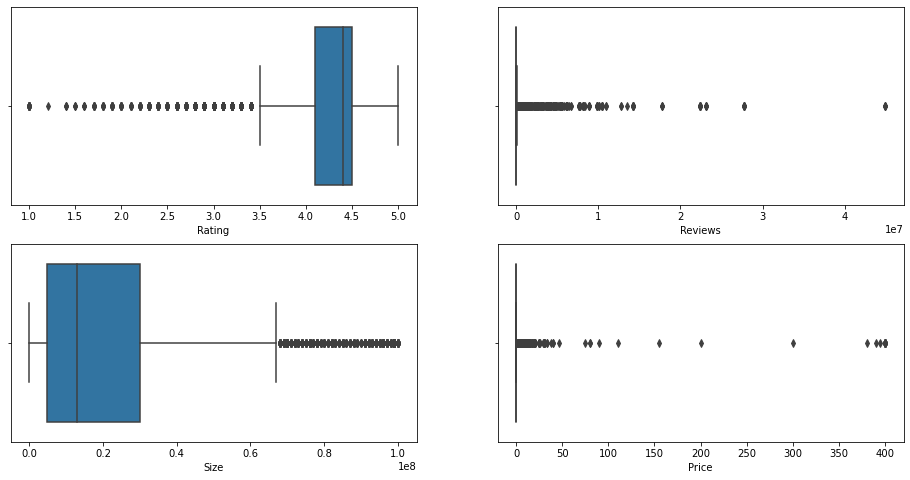

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(dataset['Rating'])
plt.subplot(2,2,2)
sns.boxplot(dataset['Reviews'])
plt.subplot(2,2,3)
sns.boxplot(dataset['Size'])
plt.subplot(2,2,4)
sns.boxplot(dataset['Price'])
plt.show()

In [29]:
# Position of the Outlier
print(np.where(dataset['Rating']>3.5))


(array([   0,    1,    2, ..., 9142, 9143, 9144], dtype=int64),)


In [30]:
print("Highest allowed",dataset['Rating'].mean() + 3*dataset['Rating'].std())
print("Lowest allowed",dataset['Rating'].mean() - 3*dataset['Rating'].std())

Highest allowed 5.730668732789631
Lowest allowed 2.687067735226062


In [31]:
dataset[dataset['Rating']==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [32]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(dataset['Rating']))
print(z)


0        0.214629
1        0.608920
2        0.968245
3        0.573954
4        0.179662
           ...   
10835    0.376808
10836    0.573954
10837    1.559682
10838    0.376808
10840    0.573954
Name: Rating, Length: 9145, dtype: float64


In [33]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))


(array([ 333,  368,  370,  376,  396,  399,  466,  504, 1753, 1851, 1933,
       1938, 2888, 2915, 2919, 3009, 3035, 3115, 3221, 3336, 3345, 3356,
       3470, 3476, 3486, 3529, 3531, 3613, 3680, 3681, 3682, 3686, 3688,
       3701, 3702, 3711, 3764, 3801, 3810, 3855, 3901, 3923, 3962, 4290,
       4305, 4398, 4422, 4574, 4579, 4580, 4607, 4614, 4622, 4641, 4655,
       4666, 4752, 4765, 4773, 4779, 4787, 4793, 4817, 4848, 4889, 4890,
       4939, 4950, 5007, 5110, 5197, 5217, 5232, 5233, 5235, 5250, 5269,
       5290, 5318, 5363, 5408, 5476, 5514, 5539, 5552, 5651, 5667, 5704,
       5722, 5815, 5827, 5839, 5859, 5939, 5969, 5972, 5983, 6062, 6069,
       6177, 6180, 6218, 6295, 6326, 6343, 6372, 6386, 6397, 6444, 6446,
       6458, 6494, 6506, 6518, 6519, 6646, 6728, 6735, 6762, 6859, 6879,
       6910, 6960, 7032, 7048, 7066, 7069, 7178, 7275, 7279, 7291, 7310,
       7312, 7328, 7332, 7378, 7379, 7382, 7392, 7397, 7421, 7453, 7585,
       7605, 7632, 7709, 7750, 7834, 7859, 8039, 8

In [34]:
dataset.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


# 👉 IQR based filtering :

Used when our data distribution is skewed.

In [35]:
percentile25 = dataset['Rating'].quantile(0.25)
percentile75 = dataset['Rating'].quantile(0.75)
percentile25


4.1

In [36]:
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(lower_limit,upper_limit)

3.499999999999999 5.1000000000000005


In [37]:
dataset[dataset['Rating'] > upper_limit]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [38]:
dataset[dataset['Rating'] < lower_limit]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2700000.0,5000,Free,0.0,Everyone,Art & Design
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250.0,1100000.0,100000,Free,0.0,Everyone,Auto & Vehicles
159,Cloud of Books,BOOKS_AND_REFERENCE,3.3,1862.0,19000000.0,1000000,Free,0.0,Everyone,Books & Reference
176,Free Book Reader,BOOKS_AND_REFERENCE,3.4,1680.0,4000000.0,100000,Free,0.0,Everyone,Books & Reference
209,Plugin:AOT v5.0,BUSINESS,3.1,4034.0,23000.0,100000,Free,0.0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
10743,FP BW LCD View,FAMILY,3.4,16.0,1200000.0,500,Free,0.0,Everyone,Entertainment
10757,Fisher-Price® Smart Connect™,TOOLS,2.7,422.0,72000000.0,50000,Free,0.0,Everyone,Tools
10766,FreedomPop Diagnostics,TOOLS,2.9,452.0,7000000.0,100000,Free,0.0,Everyone,Tools
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52.0,3600000.0,5000,Free,0.0,Teen,Books & Reference


C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

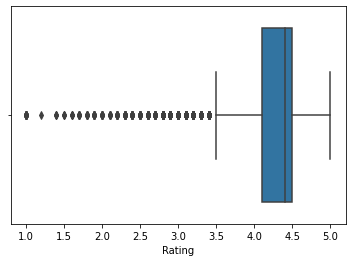

In [39]:
sns.boxplot(dataset['Rating'])

In [40]:
new_df = dataset[dataset['Rating'] < lower_limit]
new_df.shape

(687, 10)

C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

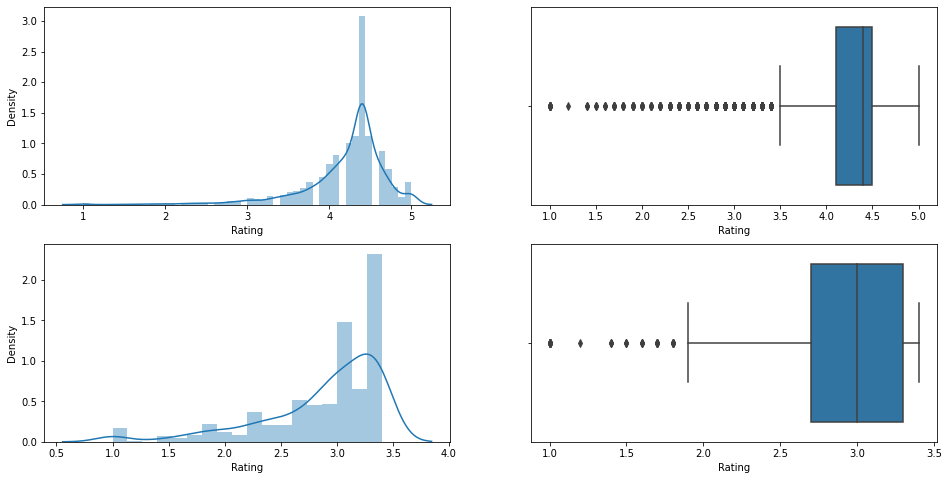

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dataset['Rating'])
plt.subplot(2,2,2)
sns.boxplot(dataset['Rating'])
plt.subplot(2,2,3)
sns.distplot(new_df['Rating'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Rating'])
plt.show()

In [42]:
new_df_cap = dataset.copy()
new_df_cap['Rating'] = np.where(
    new_df_cap['Rating'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Rating'] < lower_limit,
        lower_limit,
        new_df_cap['Rating']
    )
)

C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

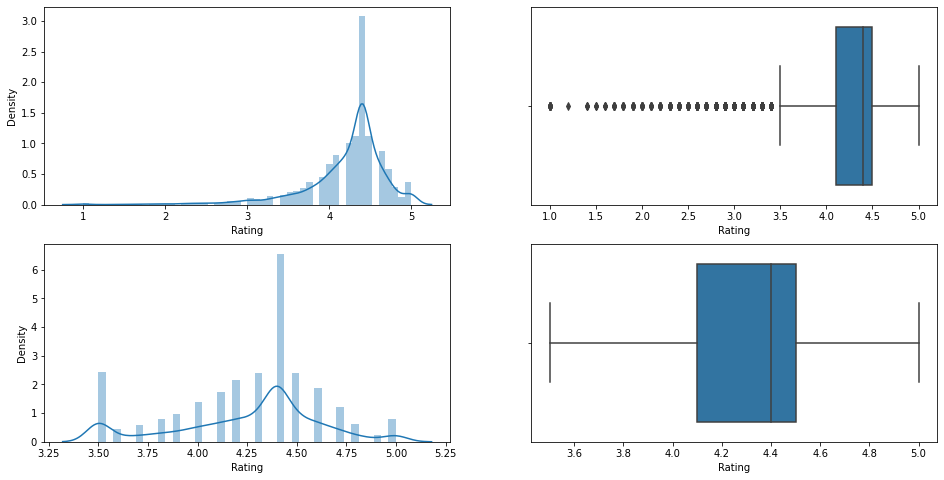

In [43]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dataset['Rating'])
plt.subplot(2,2,2)
sns.boxplot(dataset['Rating'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Rating'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Rating'])
plt.show()

In [44]:
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_fence=q1-1.5*(iqr)
  upper_fence=q3+1.5*(iqr)
  if remove_or_fill_with_quartile=="drop":
    df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
    df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
  elif remove_or_fill_with_quartile=="fill":
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])


In [45]:
identifying_treating_outliers(dataset,'Rating','drop')

C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

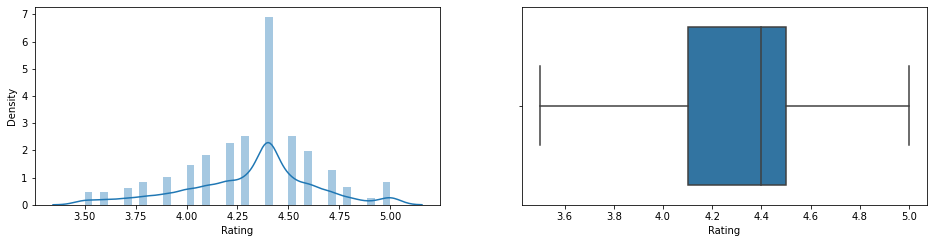

In [46]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dataset['Rating'])
plt.subplot(2,2,2)
sns.boxplot(dataset['Rating'])


# 👉 Percentile :

– This technique works by setting a particular threshold value, which decides based on our problem statement.

– While we remove the outliers using capping, then that particular method is known as Winsorization.

– Here we always maintain symmetry on both sides means if remove 1% from the right then in the left we also drop by 1%.

In [95]:
import warnings
warnings.filterwarnings('ignore')
dataset=pd.read_csv('dataset/googleplaystore.csv')
dataset.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4602,"Truecaller: Caller ID, SMS spam blocking & Dialer",COMMUNICATION,4.5,7820775,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
73,PDD-UA,AUTO_AND_VEHICLES,4.8,736,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 29, 2018",2.9,2.3.3 and up
2237,Animal Jam - Play Wild!,FAMILY,4.6,361970,58M,"5,000,000+",Free,0,Everyone,Casual;Pretend Play,"August 2, 2018",28.0.14,4.1 and up
1262,Pedometer,HEALTH_AND_FITNESS,4.4,400592,2.9M,"10,000,000+",Free,0,Everyone,Health & Fitness,"July 4, 2018",5.23,4.0 and up
5248,AJ Percent Off Calculator,SHOPPING,4.4,134,45k,"10,000+",Free,0,Everyone,Shopping,"June 4, 2013",1.2,2.2 and up


<AxesSubplot:xlabel='Rating'>

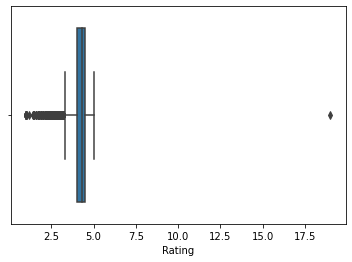

In [96]:
sns.boxplot(dataset['Rating'])

In [97]:
upper_limit = dataset['Rating'].quantile(0.99)
lower_limit = dataset['Rating'].quantile(0.01)

In [98]:
print(upper_limit,lower_limit)

5.0 2.3


In [99]:
new_df = dataset[(dataset['Rating'] <=upper_limit) & (dataset['Rating'] >= lower_limit)]

<AxesSubplot:xlabel='Rating'>

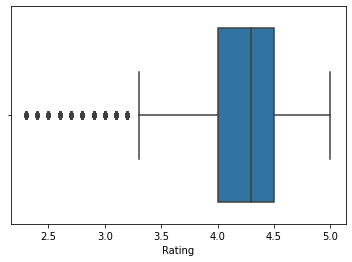

In [100]:
sns.boxplot(new_df['Rating'])

In [101]:
dataset['Rating'] = np.where(dataset['Rating']>=upper_limit,
        upper_limit,
        np.where(dataset['Rating']<=lower_limit,
        lower_limit,
        dataset['Rating']))

<AxesSubplot:xlabel='Rating'>

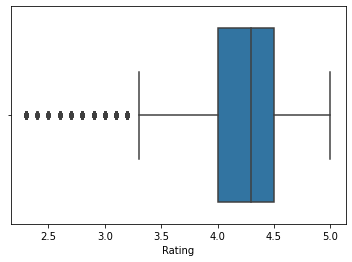

In [102]:
sns.boxplot(dataset['Rating'])

In [103]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
